The dataset being used contains variable biomedical voice measurement of 31 candidates out which 23 has Parkinson's disease(PD).
Weither the patient has parkinson disease or not is indicated by the status column with '1' indicating the presence of parkisons disease while '0' indicates normal behavoiur.

Link : https://www.kaggle.com/vikasukani/parkinsons-disease-data-set

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px
from datetime import datetime # Provides classes for working with dates and times.
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
""""
This block of code I am importing all the 
packages that are needed for fulfilling the pupose of this projects.
"""""
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
from tensorflow.keras.models import model_from_json
import shutil
import random
from tensorflow.keras.models import model_from_yaml
import glob
import matplotlib.pyplot as plt
import os.path
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from tensorflow.keras.models import load_model
%matplotlib inline
from tensorflow.keras.preprocessing import image 
import tensorflow.keras.models as Model
from tensorflow.keras.applications import imagenet_utils
import warnings
import pandas as pd

In [19]:
def get_prediction(classifier, X_train, X_test, y_train, y_test):

    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(" Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print(" Confusion Matrix: \n", cm)
    print(" Classification Report: \n", classification_report(y_test, y_pred))

In [5]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Reds):
    
       
    """
    This function priunts and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
 
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize :
        cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
    else:
        print('confusion matrix, without normalization')
    
    
    print(cm)

    thresh = cm.max()/2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black"
            )
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:

def plotImages(image_arr):
    flag, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

In [7]:
cwd = os.getcwd() 
files = os.listdir(cwd)  
print(files)

["Parkinson's Drawings", 'parkinsons.data', '.DS_Store', 'parkinson_disease_detection_code.ipynb', '.ipynb_checkpoints', 'research_papers']


# Voice Dectection

In [9]:
df = pd.read_csv('parkinsons.data')

In [10]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


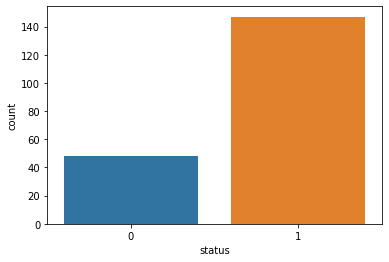

In [11]:
sns.countplot(x='status',data=df) # This method implents a count plot which is like a bar plot, but the estimator is counting the number of occurances.

The following block of code extracts the features 

In [12]:
features=df.loc[:,df.columns!='status'].values[:,1:]
labels=df.loc[:,'status'].values

In [13]:
features[0]

array([119.992, 157.302, 74.997, 0.00784, 7e-05, 0.0037, 0.00554,
       0.011090000000000001, 0.04374, 0.426, 0.02182, 0.0313,
       0.029710000000000004, 0.06545, 0.022109999999999998, 21.033,
       0.414783, 0.815285, -4.813031, 0.266482, 2.3014419999999998,
       0.284654], dtype=object)

In [14]:
print(labels[labels==1].shape[0], labels[labels==0].shape[0]) # Displaying the number of individuals who have PD.

147 48


In [15]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels


In [17]:
# Split the dataset in the one that is to be used for training and testing.
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

**Classification**

In [21]:
classifiers = [LogisticRegression(), SGDClassifier(), BernoulliNB(), LinearSVC(),
              KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier(), GradientBoostingClassifier(), 
               RandomForestClassifier(), XGBClassifier()]

for classifier in classifiers:
    print("\n\n", classifier)
    get_prediction(classifier, X_train, X_test, y_train, y_test)




 LogisticRegression()
 Accuarcy: 87.18
 Confusion Matrix: 
 [[ 4  3]
 [ 2 30]]
 Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



 SGDClassifier()
 Accuarcy: 87.18
 Confusion Matrix: 
 [[ 2  5]
 [ 0 32]]
 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.86      1.00      0.93        32

    accuracy                           0.87        39
   macro avg       0.93      0.64      0.69        39
weighted avg       0.89      0.87      0.84        39



 BernoulliNB()
 Accuarcy: 79.49
 Confusion Matrix: 
 [[ 4  3]
 [ 5 27]]
 Classification Report: 
               precision    recall  f1

# Image Detection

# Spiral

In [41]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
    
])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

In [43]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
train_path = "Parkinson's Drawings/archive/drawings/spiral/training"
test_path = "Parkinson's Drawings/archive/drawings/spiral/testing"

In [70]:
#image_generator = ImageDataGenerator(rescale=1/255)
image_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

train_batches = image_generator.flow_from_directory(directory=train_path, target_size=(224,224), classes=['healthy', 'parkinson'], batch_size=10)

test_batches = image_generator.flow_from_directory(directory=test_path, target_size=(224,224), classes=['healthy', 'parkinson'], batch_size=10, shuffle=False)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [71]:
train_imgs, train_labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

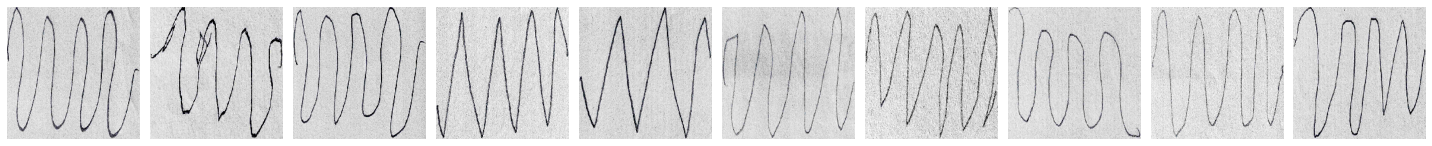

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [72]:
plotImages(train_imgs)
print(train_labels)

In [73]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

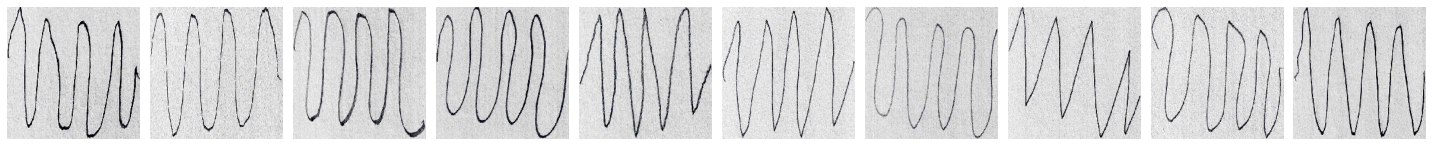

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [74]:
plotImages(test_imgs)
print(test_labels)

In [75]:
model.fit(x=train_batches, epochs=5, verbose=2)

Epoch 1/5
8/8 - 3s - loss: 0.5667 - accuracy: 0.7500
Epoch 2/5
8/8 - 3s - loss: 0.5039 - accuracy: 0.8889
Epoch 3/5
8/8 - 2s - loss: 0.4247 - accuracy: 0.9167
Epoch 4/5
8/8 - 2s - loss: 0.3839 - accuracy: 0.8472
Epoch 5/5
8/8 - 2s - loss: 0.3598 - accuracy: 0.9444


In [76]:
predictions = model.predict(x=test_batches, verbose=0)

In [77]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [78]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [110]:
accuracy=accuracy_score(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [113]:
print(f'Confusion Matrix: {cm}')
print(f'Accuracy Score: {accuracy}')

Confusion Matrix: [[11  4]
 [ 8  7]]
Accuracy Score: 0.6


# Wave

In [54]:
train_path = "Parkinson's Drawings/archive/drawings/wave/training"
test_path = "Parkinson's Drawings/archive/drawings/wave/testing"

In [82]:
#image_generator = ImageDataGenerator(rescale=1/255)
image_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

train_batches = image_generator.flow_from_directory(directory=train_path, target_size=(224,224), classes=['healthy', 'parkinson'], batch_size=10)

test_batches = image_generator.flow_from_directory(directory=test_path, target_size=(224,224), classes=['healthy', 'parkinson'], batch_size=10, shuffle=False)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [83]:
train_imgs, train_labels = next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

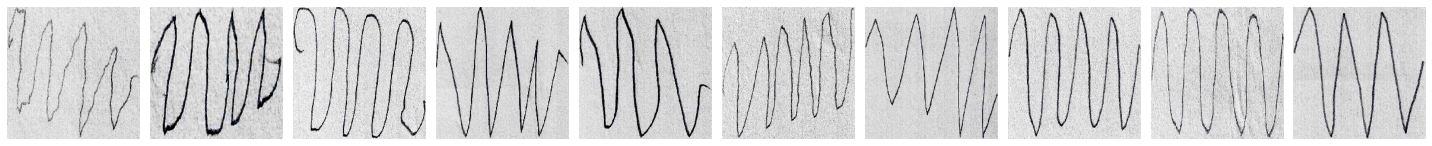

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [84]:
plotImages(train_imgs)
print(train_labels)

In [85]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

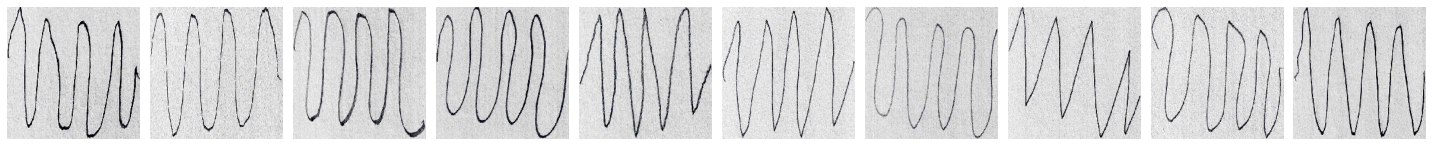

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [86]:
plotImages(test_imgs)
print(test_labels)

In [87]:
model.fit(x=train_batches, epochs=5, verbose=2)

Epoch 1/5
8/8 - 2s - loss: 0.3328 - accuracy: 0.8056
Epoch 2/5
8/8 - 2s - loss: 0.2373 - accuracy: 0.9444
Epoch 3/5
8/8 - 2s - loss: 0.2048 - accuracy: 0.9861
Epoch 4/5
8/8 - 2s - loss: 0.1548 - accuracy: 0.9861
Epoch 5/5
8/8 - 3s - loss: 0.1150 - accuracy: 1.0000


In [88]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [89]:
cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [114]:
accuracy=accuracy_score(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [115]:
print(f'Confusion Matrix: {cm}')
print(f'Accuracy Score: {accuracy}')

Confusion Matrix: [[11  4]
 [ 8  7]]
Accuracy Score: 0.6
